First 5 rows of data:
         time  temperature     pressure  concentration
0  2023-01-01    22.658105  1011.428004       0.336090
1  2023-01-02    25.306287  1007.426935       0.152656
2  2023-01-03    25.920437  1017.271920       0.245339
3  2023-01-04    28.090297  1004.646258       0.276518
4  2023-01-05    21.050757  1000.195847       0.438077

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           10 non-null     object 
 1   temperature    10 non-null     float64
 2   pressure       10 non-null     float64
 3   concentration  10 non-null     float64
dtypes: float64(3), object(1)
memory usage: 452.0+ bytes
None

Data Description:
       temperature     pressure  concentration
count    10.000000    10.000000      10.000000
mean     25.303951  1009.114119       0.297509
std       2.933446     7.497468       0.103929
mi

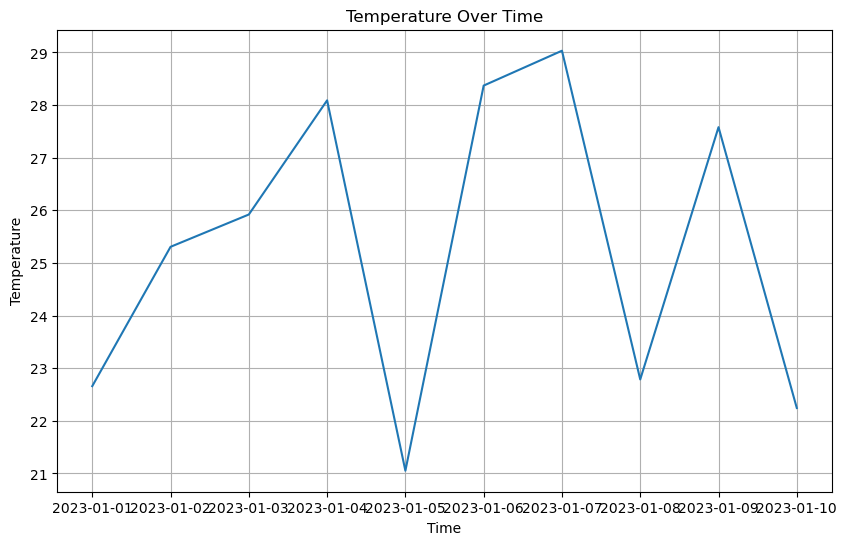

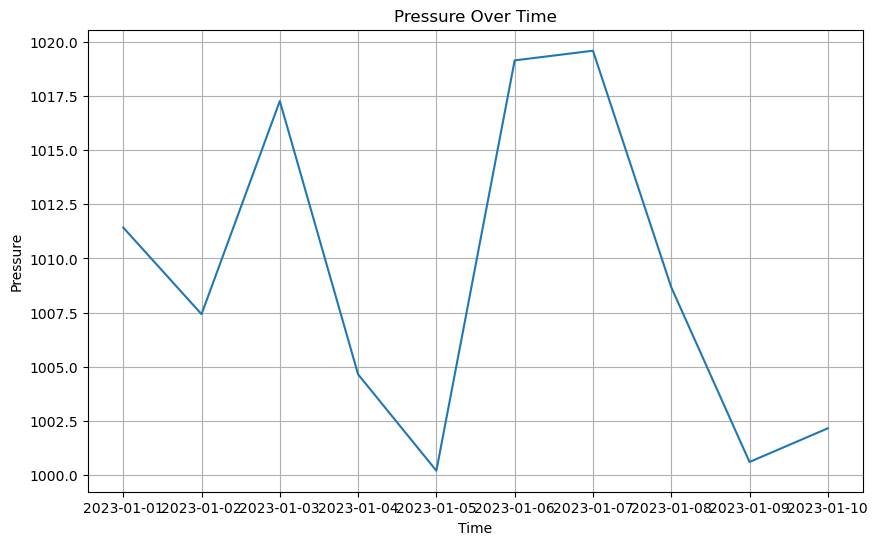

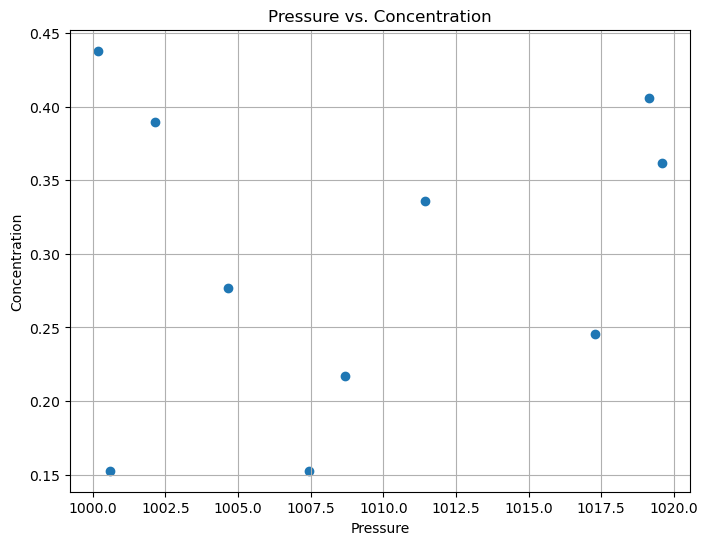

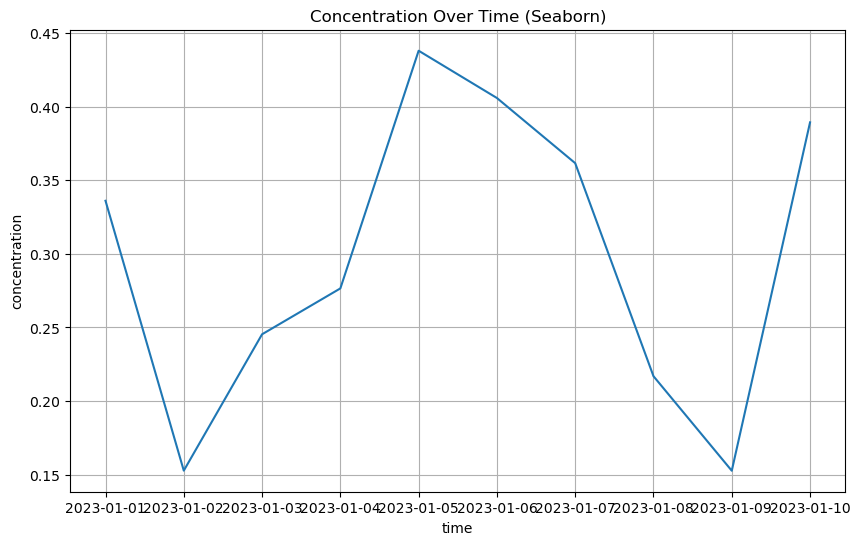

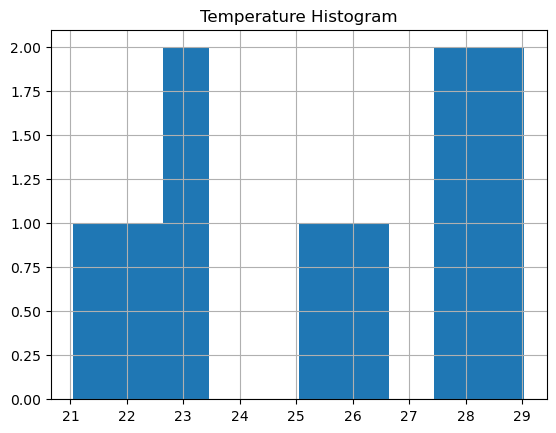

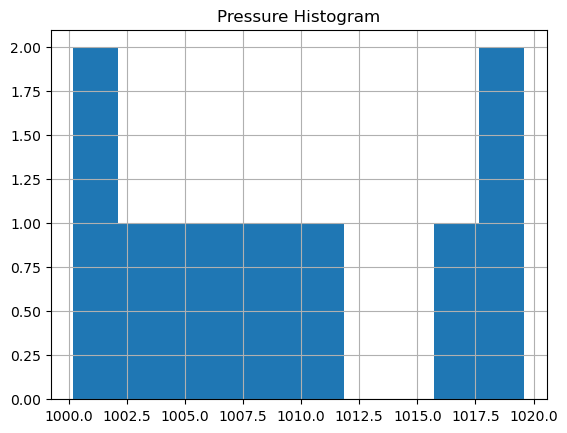

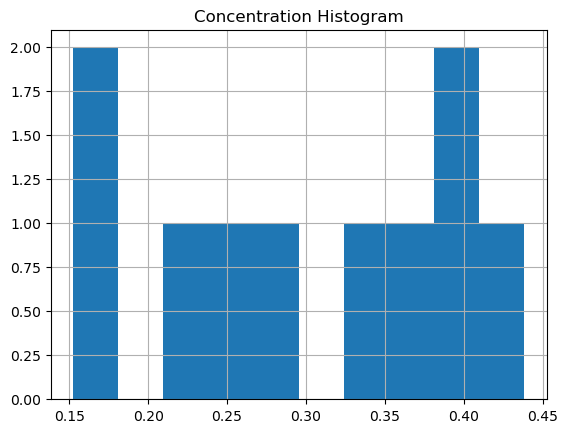

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the Data
try:
    data = pd.read_csv('experimental_data.csv')
except FileNotFoundError:
    print("Error: experimental_data.csv not found. Please ensure the file is in the same directory as the notebook.")
    exit()

# 2. Inspect and Clean the Data
print("First 5 rows of data:")
print(data.head())

print("\nData Info:")
print(data.info())

print("\nData Description:")
print(data.describe())

# Convert 'time' column to datetime
try:
    data['time'] = pd.to_datetime(data['time'])
except KeyError:
    print("Error: 'time' column not found.")
    exit()
except ValueError:
    print("Error: Could not convert 'time' column to datetime. Check the data format.")
    exit()

# Handle missing values (replace with mean for simplicity)
data.fillna(data.mean(), inplace=True)

# 3. Analyze the Data

# Calculate average temperature
average_temperature = data['temperature'].mean()
print(f"\nAverage Temperature: {average_temperature:.2f}")

# Find maximum pressure
max_pressure = data['pressure'].max()
print(f"Maximum Pressure: {max_pressure:.2f}")

# Calculate correlation between temperature and concentration
correlation = data['temperature'].corr(data['concentration'])
print(f"Correlation between Temperature and Concentration: {correlation:.2f}")

# Calculate rate of change of concentration
data['concentration_diff'] = data['concentration'].diff()
print(f"\nRate of change of concentration: {data['concentration_diff'].mean():.2f}")

# 4. Visualize the Data

# Plot temperature over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['temperature'])
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

# Plot pressure over time
plt.figure(figsize=(10, 6))
plt.plot(data['time'], data['pressure'])
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure Over Time')
plt.grid(True)
plt.show()

# Scatter plot of pressure vs. concentration
plt.figure(figsize=(8, 6))
plt.scatter(data['pressure'], data['concentration'])
plt.xlabel('Pressure')
plt.ylabel('Concentration')
plt.title('Pressure vs. Concentration')
plt.grid(True)
plt.show()

# Use Seaborn for a line plot of concentration over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='time', y='concentration', data=data)
plt.title('Concentration Over Time (Seaborn)')
plt.grid(True)
plt.show()

# Histograms
data['temperature'].hist()
plt.title("Temperature Histogram")
plt.show()

data['pressure'].hist()
plt.title("Pressure Histogram")
plt.show()

data['concentration'].hist()
plt.title("Concentration Histogram")
plt.show()